Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 715MB/s]
Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.3072 - loss: 1.6245 - val_accuracy: 0.3191 - val_loss: 1.5954
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.3281 - loss: 1.5857 - val_accuracy: 0.3191 - val_loss: 1.5929
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.3247 - loss: 1.5880 - val_accuracy: 0.3191 - val_loss: 1.5942
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.3395 - loss: 1.5777 - val_accuracy: 0.3191 - val_loss: 1.5925
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.3405 - loss: 1.5751 - val_accuracy: 0.3191 - val_loss: 1.5916


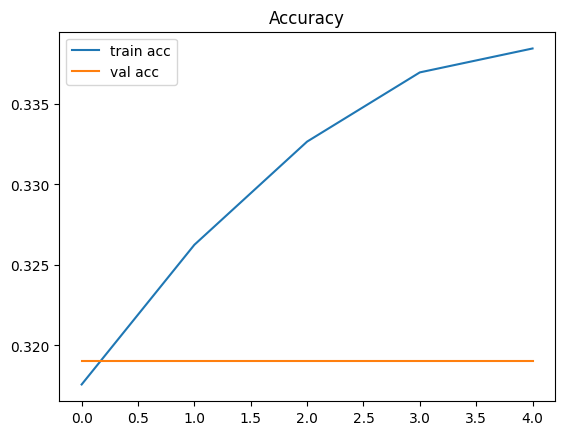

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
Predicted Emotion: joy


In [1]:
# Step 1: Setup Kaggle API
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp
!unzip emotions-dataset-for-nlp.zip

# Step 3: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 4: Load Dataset
df = pd.read_csv('train.txt', names=['text', 'emotion'], sep=';')
print(df.head())

# Step 5: Data Preprocessing
X = df['text'].values
y = df['emotion'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(np.unique(y))

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

# Step 6: Build LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

# Step 8: Plot Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# Step 9: Test Prediction
sample = ["I'm so excited to watch the new movie!"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=100, padding='post')
pred = model.predict(sample_pad)
print("Predicted Emotion:", label_encoder.classes_[np.argmax(pred)])
